In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

In [ ]:
data = pd.read_csv('african_crises.csv')

In [ ]:
data.shape

(1059, 14)

In [ ]:
data.tail()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
1054,70,ZWE,Zimbabwe,2009,1,354.8,1,1,0.0,-7.670,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.2,1,1,0.0,3.217,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.9,1,1,0.0,4.920,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.9,1,1,0.0,3.720,1,0,0,no_crisis
1058,70,ZWE,Zimbabwe,2013,0,361.9,1,1,0.0,1.632,1,0,0,no_crisis


In [ ]:
data.columns


Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd', 'domestic_debt_in_default', 'sovereign_external_debt_default', 'gdp_weighted_default', 'inflation_annual_cpi', 'independence', 'currency_crises', 'inflation_crises', 'banking_crisis'], dtype='object')

In [ ]:
unique_countries=data.country.unique()
unique_countries

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

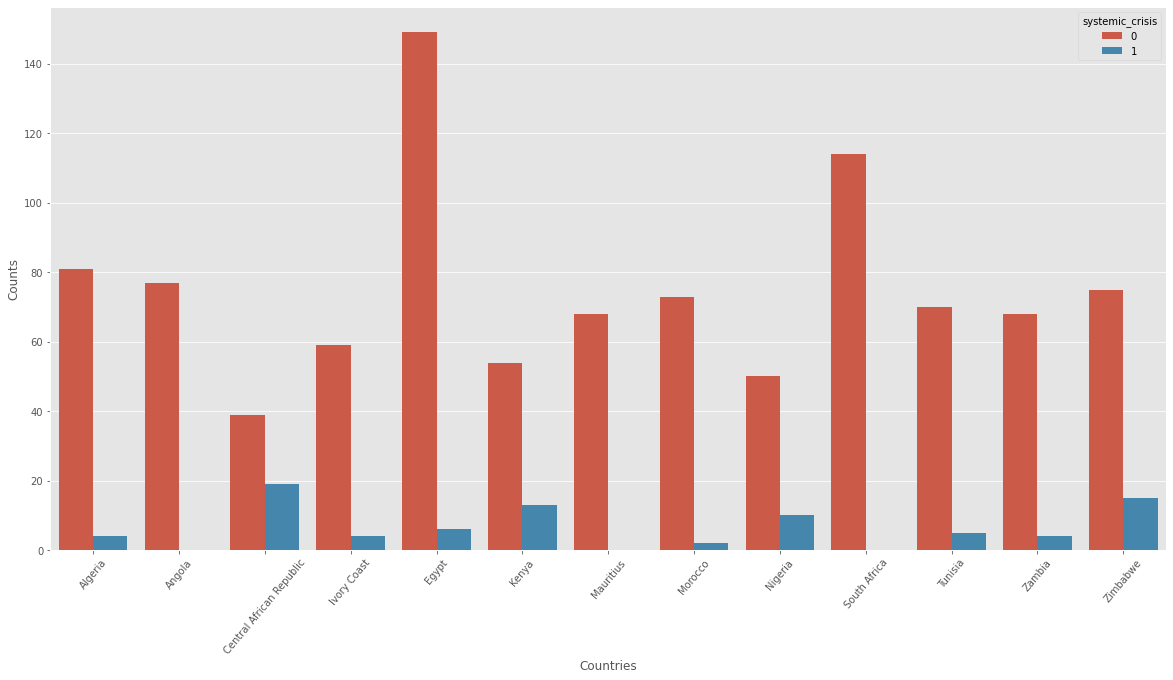

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data['country'],hue=data['systemic_crisis'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=50)

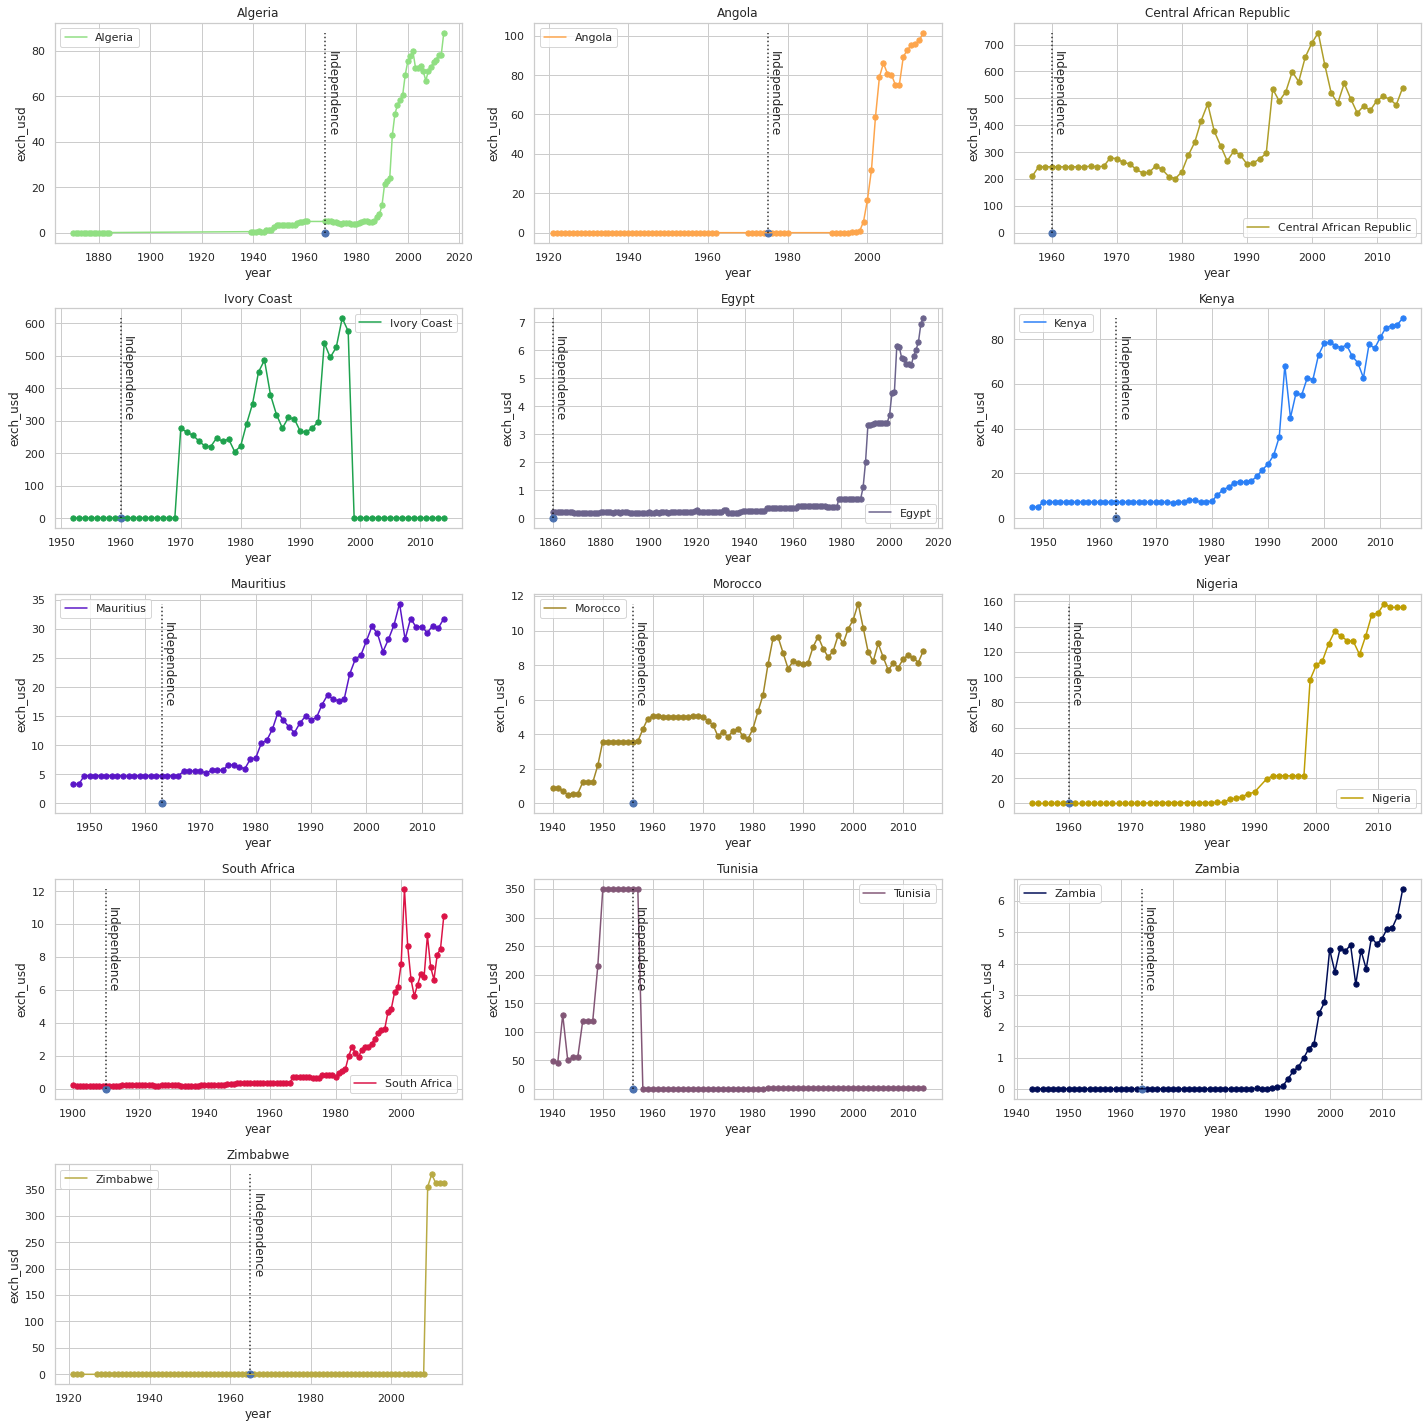

In [ ]:
import random
sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
count=1
for country in unique_countries:
    plt.subplot(5,3,count)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    sns.lineplot(data[data.country==country]['year'],
                 data[data.country==country]['exch_usd'],
                 label=country,
                 color=col)
    plt.scatter(data[data.country==country]['year'],
                data[data.country==country]['exch_usd'],
                color=col,
                s=28)
    plt.plot([np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
              np.min(data[np.logical_and(data.country==country,data.independence==1)]['year'])],
             [0,
              np.max(data[data.country==country]['exch_usd'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
             np.max(data[data.country==country]['exch_usd'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
                y=0,
                s=50)
    plt.title(country)
plt.tight_layout()
plt.show()

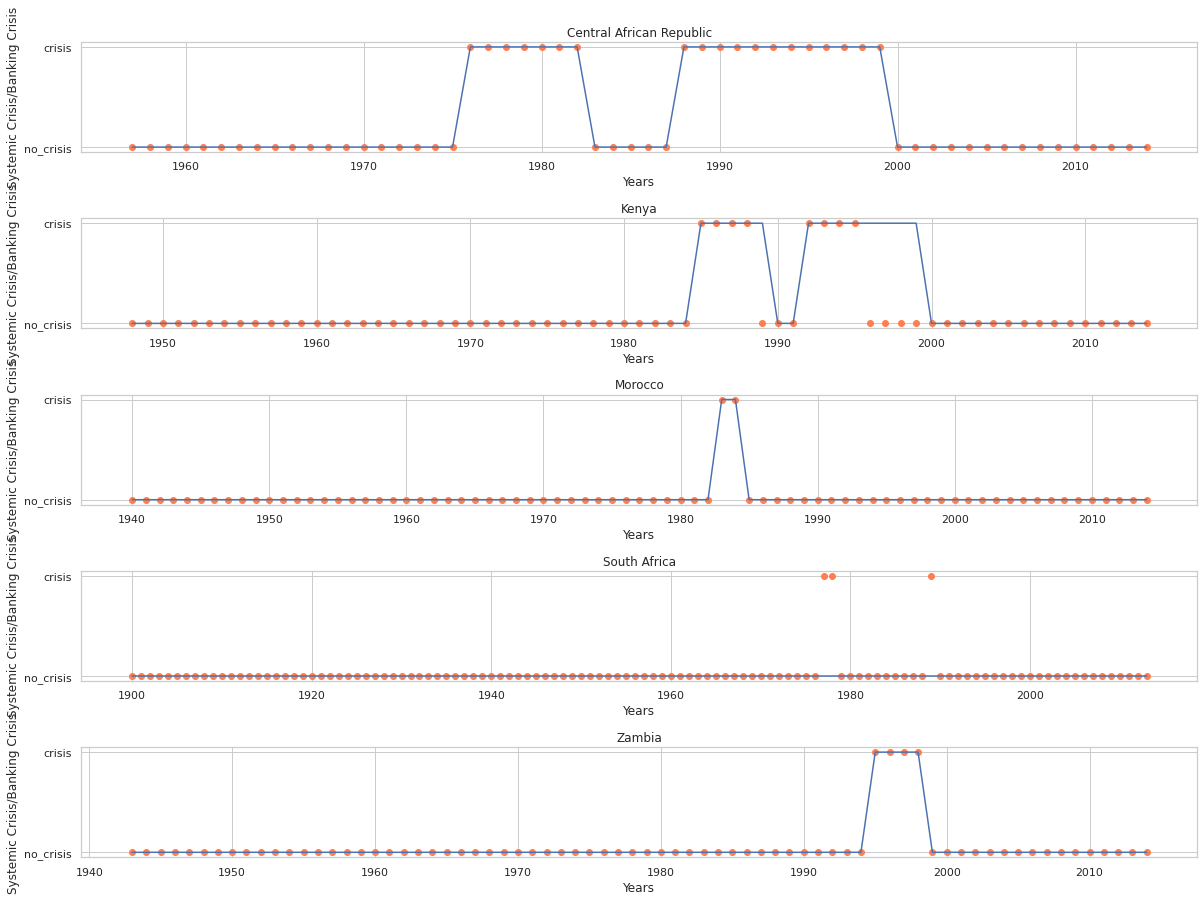

In [ ]:
systemic = data[['year','country', 'systemic_crisis', 'banking_crisis']]
systemic = systemic[(systemic['country'] == 'Central African Republic') | (systemic['country']=='Kenya') | (systemic['country']=='South Africa') | (systemic['country']=='Zambia') | (systemic['country']=='Morocco')]
plt.figure(figsize=(20,15))
count = 1

for country in systemic.country.unique():
    plt.subplot(len(systemic.country.unique()),1,count)
    subset = systemic[(systemic['country'] == country)]
    sns.lineplot(subset['year'],subset['systemic_crisis'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Systemic Crisis/Banking Crisis')
    plt.title(country)
    count+=1

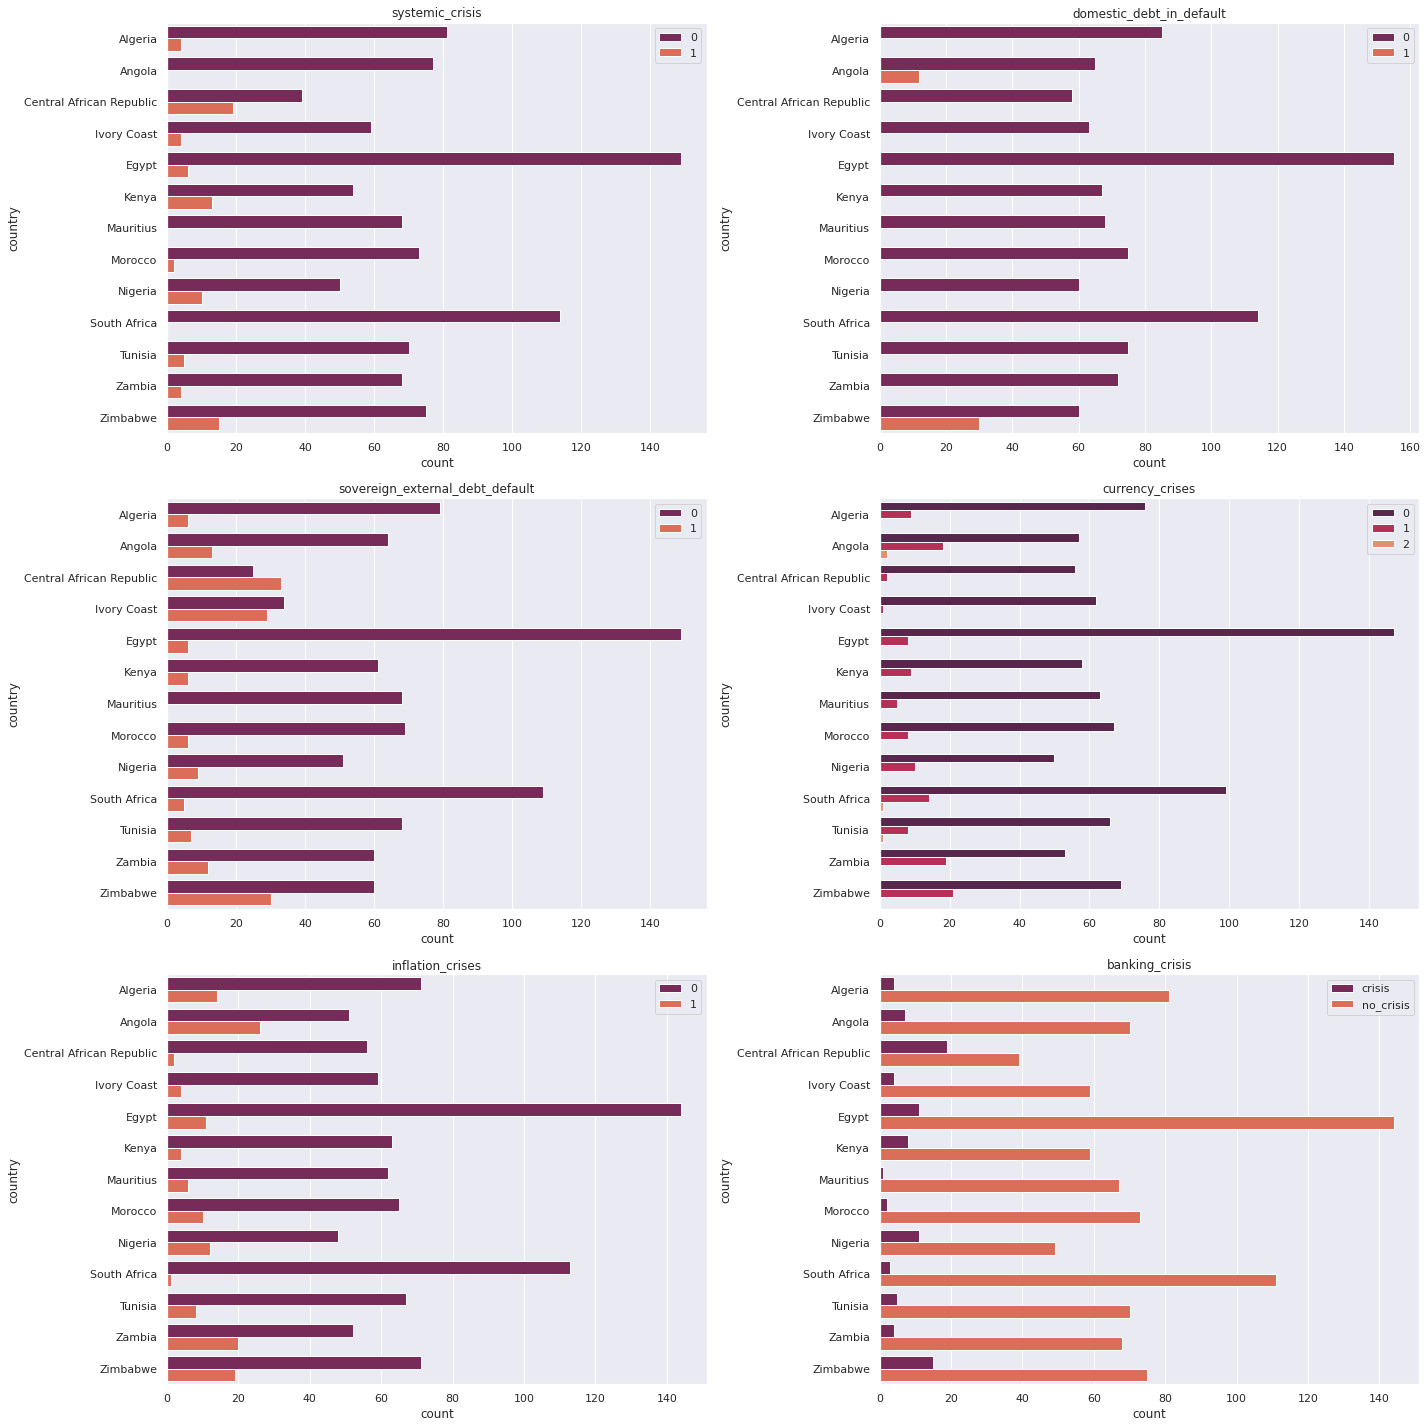

In [ ]:
sns.set(style='darkgrid')
cols=['systemic_crisis','domestic_debt_in_default','sovereign_external_debt_default','currency_crises','inflation_crises','banking_crisis']
plt.figure(figsize=(20,20))
count=1
for col in cols:
    plt.subplot(3,2,count)
    count+=1
    sns.countplot(y=data.country,hue=data[col],palette='rocket')
    plt.legend(loc=0)
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
X = data[['systemic_crisis', 'exch_usd', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'gdp_weighted_default',
       'inflation_annual_cpi', 'independence', 'currency_crises',
       'inflation_crises']]
# Define the Y variable 
Y = data['banking_crisis']

## percentage of  crisis & no crisis

count_no_crisis = len(data[Y=='no_crisis'])
count_crisis = len(data[Y=='crisis'])
pct_of_no_crisis = count_no_crisis/(count_no_crisis+count_crisis)
print("percentage of no crisis is", pct_of_no_crisis*100)
pct_of_crisis = count_crisis/(count_no_crisis+count_crisis)
print("percentage of crisis", pct_of_crisis*100)

percentage of no crisis is 91.123701605288
percentage of crisis 8.876298394711993


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
df = pd.read_csv('african_crises.csv')

In [ ]:
df['banking_crisis'] = df['banking_crisis'].replace('crisis',np.nan)
df['banking_crisis'] = df['banking_crisis'].fillna(1)
df['banking_crisis'] = df['banking_crisis'].replace('no_crisis',np.nan)
df['banking_crisis'] = df['banking_crisis'].fillna(0)

In [ ]:
df.drop(['cc3','country'], axis=1, inplace=True)

In [ ]:
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['banking_crisis'] = df['banking_crisis']
df = df_scaled

# defining the input data, X, and the desired results, y 

X = df.loc[:,df.columns != 'banking_crisis']
y = df.loc[:, 'banking_crisis']

# breaking data into training data, validation data, and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2)

Using Simple Neural Network to train our model

In [ ]:
# create model
model = Sequential()
model.add(Dense(11, input_dim=11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# training the network

model.fit(X_train, y_train, epochs=200)

# scoring it on the data it trained on as well as test data

scores = model.evaluate(X_train, y_train)
print ("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print ("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Epoch 1/200
22/22 [==============================] - 0s 1ms/step - loss: 0.5880 - accuracy: 0.8582
Epoch 2/200
22/22 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.9335
Epoch 3/200
22/22 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.9380
Epoch 4/200
22/22 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.9350
Epoch 5/200
22/22 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.9350
Epoch 6/200
22/22 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 0.9350
Epoch 7/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2996 - accuracy: 0.9424
Epoch 8/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2726 - accuracy: 0.9498
Epoch 9/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.9527
Epoch 10/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2309 - accuracy: 0.9542
Epoch 11/

The model was 97.78% accurate which is a good score

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Text(30.499999999999993, 0.5, 'Actual')

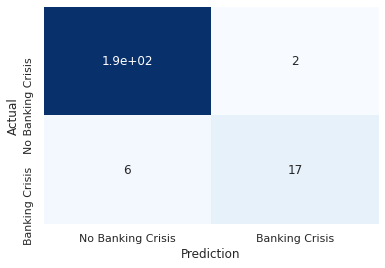

In [ ]:
# plotting the confusion matrix

y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test,y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Banking Crisis','Banking Crisis'], yticklabels=['No Banking Crisis','Banking Crisis'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

With the confusion matric if only failed to to get  6:2 incorrect results 
The neural network classifier  has a higher performance accuracy boost.
